<a href="https://colab.research.google.com/github/fjopereira/estado_vacinacao_opendatasus/blob/main/3_Tratando_os_dados_parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tratando o csv gerado nos outros processos para realizar o input e trazer o retorno solicitado

In [305]:
#imports
import pandas as pd
import seaborn as sns
sns.set()

In [306]:
#criando a df
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/csv/vacina-covid-completo/estados_vacinacao.csv', sep=';')

In [307]:
#informações sobre o df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      28 non-null     int64  
 1   UF              28 non-null     object 
 2   QTDE_VACINADOS  28 non-null     int64  
 3   Unnamed: 0.1    27 non-null     float64
 4   Estado          27 non-null     object 
 5   Habitantes      27 non-null     object 
 6   Observação      27 non-null     object 
dtypes: float64(1), int64(2), object(4)
memory usage: 1.7+ KB


In [308]:
#renomeando campos
df.rename(columns={'QTDE_VACINADOS': 'Vacinados', 'Habitantes': 'População', 'Estado': 'Unidade Federativa' }, inplace=True)

In [309]:
#drop colunas que não serão nescessárias
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('Unnamed: 0.1', axis=1, inplace=True)
df.drop('Observação', axis=1, inplace=True)

In [310]:
#drop os NaNs
df = df.dropna()

In [311]:
#visualizando
df

,UF,Vacinados,Unidade Federativa,População
0,AC,369829,Acre,894.470
1,AL,1434080,Alagoas,3.351.543
2,AM,1791391,Amazonas,4.207.714
3,AP,273316,Amapá,861.773
4,BA,6149381,Bahia,14.930.634
5,CE,3265511,Ceará,9.187.103
6,DF,1295134,Distrito Federal,3.055.149
7,ES,2232965,Espírito Santo,4.064.052
8,GO,3118363,Goiás,7.113.540
9,MA,2978826,Maranhão,7.114.598


In [312]:
#removendo os pontos para calcular
df['População'] = df['População'].apply(lambda x: str(x).replace(".", ""))

In [313]:
#alterando para int
df['População'] = df['População'].astype('int')

In [314]:
#visualizando
df

,UF,Vacinados,Unidade Federativa,População
0,AC,369829,Acre,894470
1,AL,1434080,Alagoas,3351543
2,AM,1791391,Amazonas,4207714
3,AP,273316,Amapá,861773
4,BA,6149381,Bahia,14930634
5,CE,3265511,Ceará,9187103
6,DF,1295134,Distrito Federal,3055149
7,ES,2232965,Espírito Santo,4064052
8,GO,3118363,Goiás,7113540
9,MA,2978826,Maranhão,7114598


In [315]:
#calculando aderência
df['Aderência (%)'] = df['Vacinados'] / df['População'] * 100

In [316]:
#ordenando as colunas
df = df[['Unidade Federativa', 'População', 'Vacinados', 'Aderência (%)', 'UF']]

#plot de um gráfico (população x vacinados)

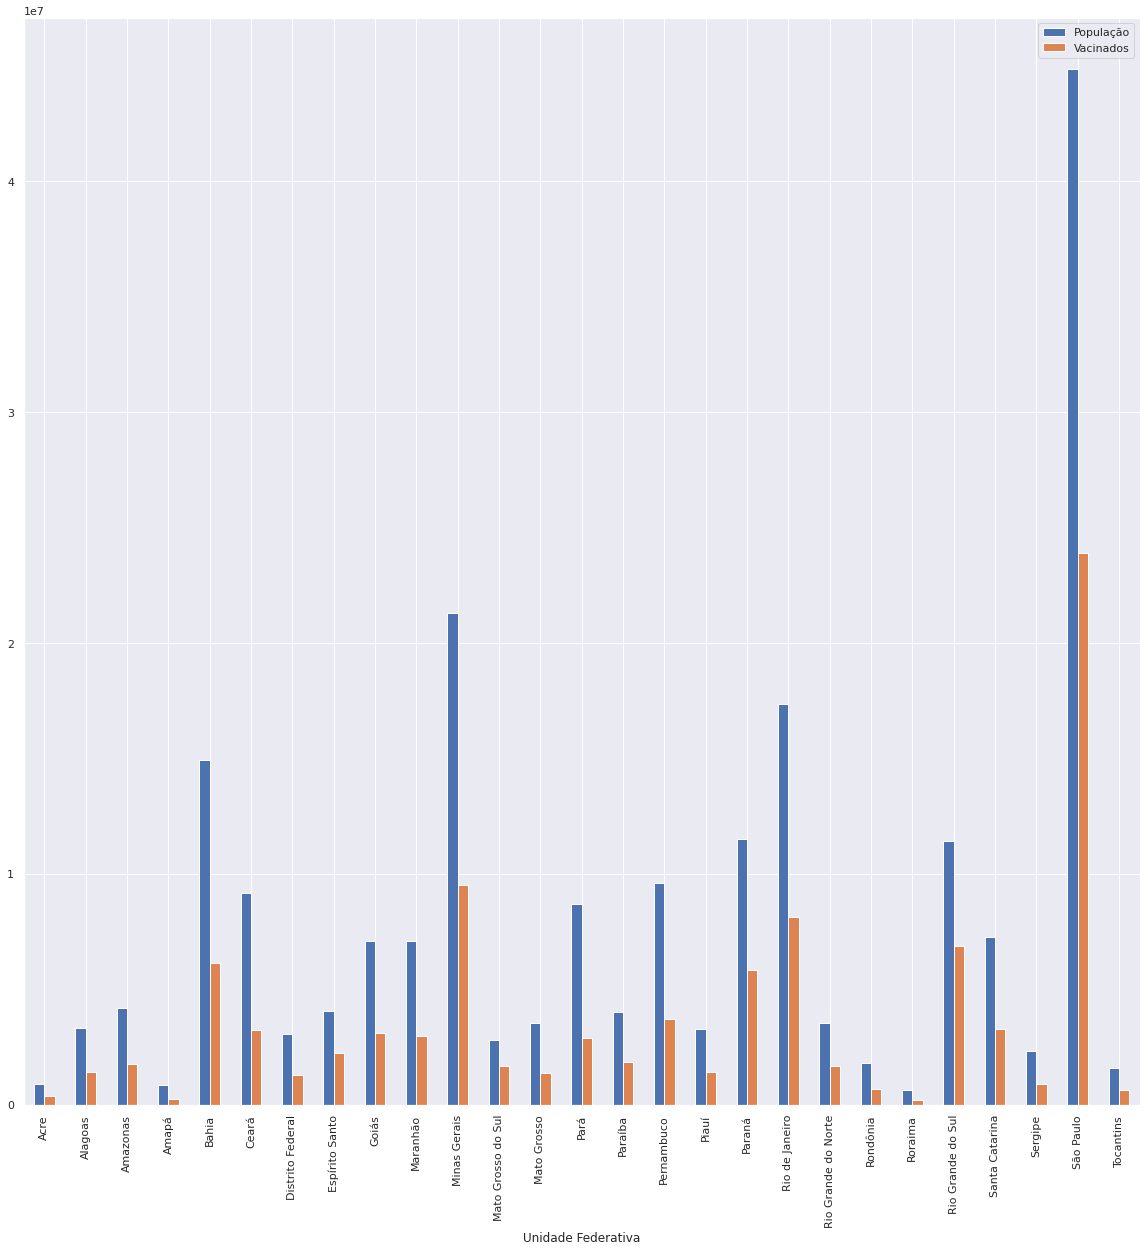

In [317]:
df.plot(kind='bar', x='Unidade Federativa',  y=['População', 'Vacinados'], figsize=(20,20))

In [318]:
#formatando campo Aderência
df_print =  df.style.format({'Aderência (%)':'{:.2f}'})

In [319]:
df_print

,Unidade Federativa,População,Vacinados,Aderência (%),UF
0,Acre,894470,369829,41.35,AC
1,Alagoas,3351543,1434080,42.79,AL
2,Amazonas,4207714,1791391,42.57,AM
3,Amapá,861773,273316,31.72,AP
4,Bahia,14930634,6149381,41.19,BA
5,Ceará,9187103,3265511,35.54,CE
6,Distrito Federal,3055149,1295134,42.39,DF
7,Espírito Santo,4064052,2232965,54.94,ES
8,Goiás,7113540,3118363,43.84,GO
9,Maranhão,7114598,2978826,41.87,MA


In [320]:
##mostra somente 2 dig depois da virgula##
#pd.set_option('display.precision', 2)
##volta ao normal##
#pd.reset_option('^display.', silent=True)

#Tabela dinâmica com opção de filtrar, classificar, ordenar e etc

In [321]:
#montando uma tabela dinâmica que permite filtros
from google.colab.data_table import DataTable
DataTable(df, include_index=False, num_rows_per_page=27, max_columns=5, min_width='80%')

,Unidade Federativa,População,Vacinados,Aderência (%),UF
0,Acre,894470,369829,41.346160,AC
1,Alagoas,3351543,1434080,42.788650,AL
2,Amazonas,4207714,1791391,42.573972,AM
3,Amapá,861773,273316,31.715545,AP
4,Bahia,14930634,6149381,41.186335,BA
5,Ceará,9187103,3265511,35.544513,CE
6,Distrito Federal,3055149,1295134,42.391844,DF
7,Espírito Santo,4064052,2232965,54.944302,ES
8,Goiás,7113540,3118363,43.837007,GO
9,Maranhão,7114598,2978826,41.869210,MA


In [322]:
#lista das UFs
ufs =['AC',
          'AL',
          'AM',
          'AP',
          'BA',
          'CE',
          'DF',
          'ES',
          'GO',
          'MA',
          'MG',
          'MS',
          'MT',
          'PA',
          'PB',
          'PE',
          'PI',
          'PR',
          'RJ',
          'RN',
          'RO',
          'RR',
          'RS',
          'SC',
          'SE',
          'SP',
          'TO'
]

#bloco com o input para trazer somente o UF digitado

In [323]:
#input para receber informações do usuário
vs_UF = ''
tentativas = 0
while vs_UF not in ufs:
  vs_UF = input("Informe o estado: \n").upper() 
  tentativas += 1
  if tentativas == 3:
    break


df_print = df[df['UF']== vs_UF]
df_print = df_print.style.hide_columns('UF').hide_index().set_properties(**{'background-color':'white','color':'black','border-color':'black'}).format({'Aderência (%)':'{:.2f}'})
df_print


Informe o estado: 
ac


Unidade Federativa,População,Vacinados,Aderência (%)
Acre,894470,369829,41.35
